In [1]:
import pandas as pd

# Loading Dataset

In [2]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    return df

In [3]:
movies_df = load_dataset('data/all_movies.csv')
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [4]:
annotations_word_embedding_fox_news_df = load_dataset('annotations/annotations_word_embedding_fox_news.csv')
annotations_word_embedding_fox_news_df.rename(columns={'label': 'label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df

,movie_name,index,label_fox_news
0,12 Angry Men,0,not hate speech
1,12 Angry Men,1,not hate speech
2,12 Angry Men,2,not hate speech
3,12 Angry Men,3,not hate speech
4,12 Angry Men,4,hate speech
...,...,...,...
359031,You,1767,not hate speech
359032,You,1768,not hate speech
359033,You,1769,not hate speech
359034,You,1770,not hate speech


In [5]:
annotations_word_embedding_twitter_df = load_dataset('annotations/annotations_word_embedding_twitter.csv')
annotations_word_embedding_twitter_df.rename(columns={'label': 'label_twitter'}, inplace=True)
annotations_word_embedding_twitter_df

,movie_name,index,label_twitter
0,12 Angry Men,0,neither
1,12 Angry Men,1,neither
2,12 Angry Men,2,offensive language
3,12 Angry Men,3,neither
4,12 Angry Men,4,neither
...,...,...,...
359031,You,1767,offensive language
359032,You,1768,neither
359033,You,1769,neither
359034,You,1770,offensive language


# Joining Datasets

In [6]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_word_embedding_twitter_df, on=['index', 'movie_name'])

In [7]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither


## Analyse Results

In [8]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [9]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

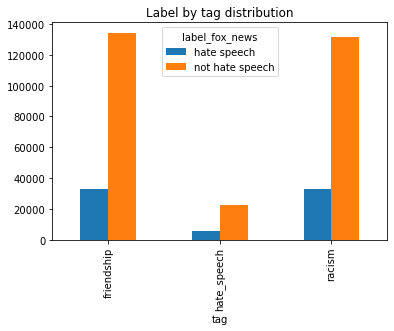

In [10]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_fox_news')

<AxesSubplot:title={'center':'Label by tag distribution (Percentage)'}, xlabel='tag'>

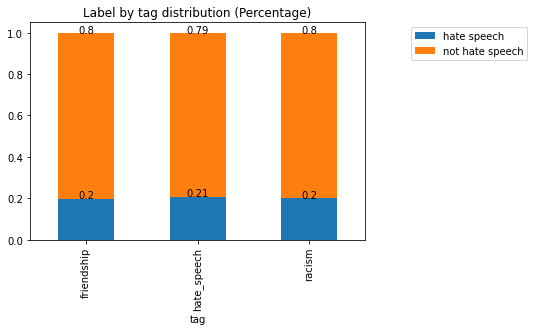

In [11]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_fox_news')

## hate speech examples

In [20]:
hatespeech_sentences = df_results[df_results.label_fox_news=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

 For a moment, we had our doubts.
---
murder in the first degree.
---
A premeditated murder is the most serious charge tried in our criminal courts.
---
One man is dead.
---
If there's a reasonable doubt in your minds as to the guilt of the accused...
---
a reasonable doubt...
---
then you must bring me a verdict of not guilty.
---
Now if, however, there's no reasonable doubt...
---
The alternate jurors are excused.
---
Oh, I thought we might want to vote by ballot.
---
Yeah? I almost fell asleep.
---
even when it's an openandshut case like this one.
---
 Mr. Foreman.
---
 Gee, I don't know.
---
No real... dead spots.
---
I tell you, we were lucky to get a murder case.
---
Isn't that funny?
---
If you had to sort out all that junk...
---
Like that thing with the movies.
---
You know what we're dealing with.
---
Yeah, we can all get outta here pretty quick, huh?
---
Where do we sit here?
---
 I think it's reasonable to sit in order.
---
 Yeah. That's 12. We go around...
---
I beg pardon

# Word embedding

## Twitter

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

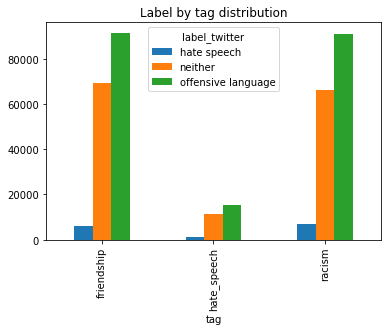

In [13]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='label_twitter')

<AxesSubplot:title={'center':'Label by tag distribution (Percentage)'}, xlabel='tag'>

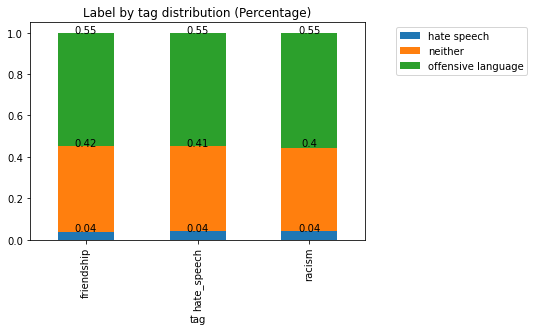

In [14]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)', label='label_twitter')

In [15]:
hatespeech_sentences = df_results[df_results.label_twitter=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

A premeditated murder is the most serious charge tried in our criminal courts.
---
Okay, gentlemen, everybody's here.
---
even when it's an openandshut case like this one.
---
 What do you got, a cold?
---
Aw, listen, you analyze the figures, you'll see it happens all the time.
---
Is  Is everyone here?
---
Maybe we all can get outta here, huh?
---
Of course you know that we have a firstdegree murder charge here...
---
Would you like me to list them for you?
---
Do you believe his story?
---
I mean, they're born liars.
---
 Only an ignorant man can believe that.
---
Do you think you were born with a monopoly on the truth?
---
You see, I was looking for a motive.
---
Because if you don't have a motive, where's your case, right?
---
Well, you said it provided a motive.
---
It's a normal state of affairs with him.
---
It may have been two too many.
---
Well, look at his record.
---
 You got any kids?
---
He was born in a slum.
---
 Come on now.
---
What do you mean supposing they're wrong

## Intersections

### both are "hate speech"

In [16]:
df_intersections = df_results[(df_results.label_twitter=='hate speech')&(df_results.label_fox_news=='hate speech')]

In [17]:
df_intersections

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
8,12 Angry Men,8,A premeditated murder is the most serious char...,2065,racism,hate speech,hate speech
68,12 Angry Men,68,even when it's an openandshut case like this one.,2065,racism,hate speech,hate speech
198,12 Angry Men,198,"Maybe we all can get outta here, huh?",2065,racism,hate speech,hate speech
201,12 Angry Men,201,Of course you know that we have a firstdegree ...,2065,racism,hate speech,hate speech
300,12 Angry Men,300,"I mean, they're born liars.",2065,racism,hate speech,hate speech
...,...,...,...,...,...,...,...
357811,You,547,But who laid down in reference?,1772,friendship,hate speech,hate speech
357932,You,668,"You in your feelings again, talking about tak...",1772,friendship,hate speech,hate speech
358723,You,1459,"Look man, I hope we can move on from this right?",1772,friendship,hate speech,hate speech
358766,You,1502,"But you can't help, but see them.",1772,friendship,hate speech,hate speech


### fox news is "hate speech" and twitter is "offensive language"

In [18]:
df_intersections = df_results[(df_results.label_twitter=='offensive language')&(df_results.label_fox_news=='hate speech')]

In [19]:
df_intersections

,movie_name,index,utterance,count_utterances,tag,label_fox_news,label_twitter
12,12 Angry Men,12,One man is dead.,2065,racism,hate speech,offensive language
14,12 Angry Men,14,If there's a reasonable doubt in your minds as...,2065,racism,hate speech,offensive language
15,12 Angry Men,15,a reasonable doubt...,2065,racism,hate speech,offensive language
25,12 Angry Men,25,The alternate jurors are excused.,2065,racism,hate speech,offensive language
64,12 Angry Men,64,Yeah? I almost fell asleep.,2065,racism,hate speech,offensive language
...,...,...,...,...,...,...,...
358975,You,1711,Dad man you don't even know how relieved that...,1772,friendship,hate speech,offensive language
358981,You,1717,I love you too.,1772,friendship,hate speech,offensive language
358987,You,1723,It's time to go to bed and let these two young...,1772,friendship,hate speech,offensive language
359011,You,1747,"Shut up, you know good and well, ain't nothin...",1772,friendship,hate speech,offensive language
